In [14]:
import torch
from torch import nn
from torch.nn import functional as F
import numpy as np
from math import log

import sys
sys.path.append("..")

from matplotlib import pyplot as plt
%matplotlib inline

<h2 align="center">Positional Encoding</h2>

* >In order for the model to make use of the oder of the sequence, we must inject some information about the relative or absolute position of the tokens in the sequence.
* >We add "*positional encodings*" to the input embeddings at the bottoms of the encoder and decoder stacks.
* >The positional encodings will have the same dimension d_model as the embeddings, so that the two can be summed.

<div align="center">
    <h3 align="center">PE<sub>(<i>pos, 2i</i>)</sub> = <i>sin(pos/(10000<sup>2i/d_model</sup>))</i></h3>
</div>
<div align="center">
    <h3 align="center">PE<sub>(<i>pos, 2i+1</i>)</sub> = <i>cos(pos/(10000<sup>2i/d_model</sup>))</i></h3>
</div>

* Above are the positional encodings that we use in this model.
* *pos* is the position and *i* is the dimension: Each dimension of the positional encoding corresponds to a sinusoid. The wavelengths form a geometric progression from 2pi to 10000x2pi.

In [15]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout_prob, max_len: int = 5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout_prob)
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(
            torch.arange(0, d_model, 2) * -(log(10000.0) / d_model)
        )
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.pe = torch.tensor(pe.unsqueeze(0), requires_grad=False)
       
    def forward(self, x: torch.Tensor):
        x = x + Variable(self.pe[:, :x.size(1)], requires_grad=False)
        return self.dropout(x)

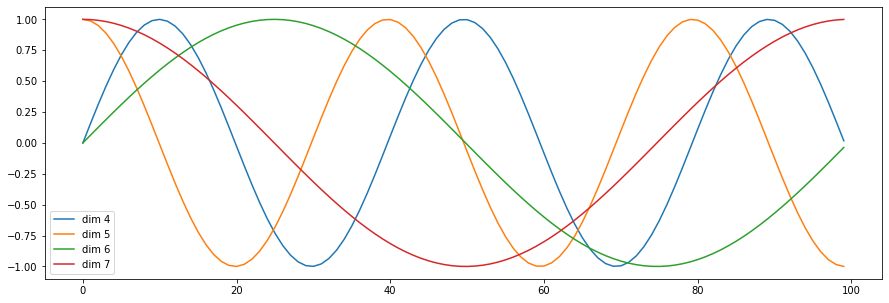

In [16]:
plt.figure(figsize=(15, 5))
pe = PositionalEncoding(20, 0)
y = pe(Variable(torch.zeros(1, 100, 20)))
plt.plot(np.arange(100), y[0, :, 4:8].data.numpy())
plt.legend([f"dim {p}" for p in [4, 5, 6, 7]]);